In [1]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
date = '1208'
variable = ['H', 'D']

In [3]:
file_list = os.listdir('../data/history_data')
file_list = [f for f in file_list if date in f]

In [4]:
file_list

['1208_LdChange_H1.0D0.0.csv',
 '1208_LdChange_H1.2D0.12.csv',
 '1208_LdChange_H1.5D0.2.csv',
 '1208_LdChange_H1.5D0.25.csv',
 '1208_LdChange_H1.8D0.2.csv',
 '1208_SyncOn_H1.0D0.0.csv',
 '1208_SyncOn_H1.2D0.12.csv',
 '1208_SyncOn_H1.5D0.1.csv',
 '1208_SyncOn_H1.5D0.2.csv',
 '1208_SyncOn_H1.5D0.25.csv',
 '1208_SyncOn_H1.8D0.2.csv']

In [5]:
class Data():
    def __init__(self):
        pass

In [6]:
data_dict = {}

In [7]:
for f in file_list:
    f_info = f.replace('.csv', '').split('_')
    locals()[f_info[1]] = Data()
    locals()[f_info[1]].date = f_info[0]
    locals()[f_info[1]].case = f_info[1]
    locals()[f_info[1]].variables = re.findall(r'[0-9]+\.?[0-9]*',f_info[2])
    locals()[f_info[1]].data = pd.read_csv('../data/history_data/'+f)
    data_dict[f_info[1]+f_info[2]] = locals()[f_info[1]]

In [8]:
data_dict

{'LdChangeH1.0D0.0': <__main__.Data at 0x174815c3d50>,
 'LdChangeH1.2D0.12': <__main__.Data at 0x174812cee50>,
 'LdChangeH1.5D0.2': <__main__.Data at 0x174fff359d0>,
 'LdChangeH1.5D0.25': <__main__.Data at 0x174814f3ed0>,
 'LdChangeH1.8D0.2': <__main__.Data at 0x174815d6b50>,
 'SyncOnH1.0D0.0': <__main__.Data at 0x174815b8dd0>,
 'SyncOnH1.2D0.12': <__main__.Data at 0x174815b8ed0>,
 'SyncOnH1.5D0.1': <__main__.Data at 0x174815b91d0>,
 'SyncOnH1.5D0.2': <__main__.Data at 0x174815ba090>,
 'SyncOnH1.5D0.25': <__main__.Data at 0x174815ba4d0>,
 'SyncOnH1.8D0.2': <__main__.Data at 0x174815ba910>}

In [9]:
data_dict['SyncOnH1.2D0.12'].data

,Time,Subsystem #1|CTLs|Vars|Tm,Subsystem #1|CTLs|Vars|WPU,Subsystem #1|Machines|M1|Te_sync,Subsystem #1|Machines|M1|w_sync
0,0.00000,0.119899,1.000059,0.000001,0.999552
1,0.00005,0.119899,1.000059,0.000001,0.999552
2,0.00010,0.119899,1.000059,0.000001,0.999552
3,0.00015,0.119899,1.000059,0.000001,0.999552
4,0.00020,0.119899,1.000059,0.000001,0.999552
...,...,...,...,...,...
1995,0.09975,0.000000,1.010922,-0.647446,1.010421
1996,0.09980,0.000000,1.010933,-0.643762,1.010432
1997,0.09985,0.000000,1.010944,-0.639928,1.010442
1998,0.09990,0.000000,1.010955,-0.635946,1.010453


LdChange
['1.0', '0.0']


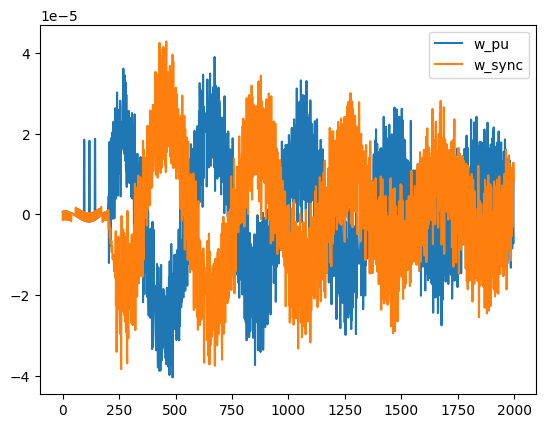

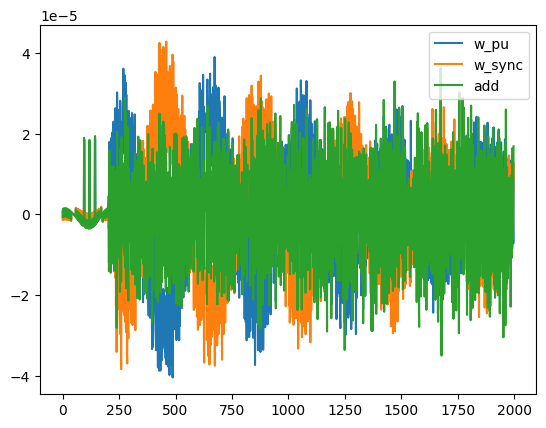

LdChange
['1.2', '0.12']


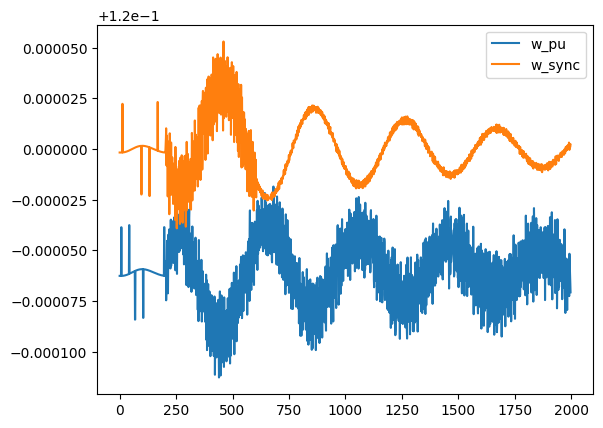

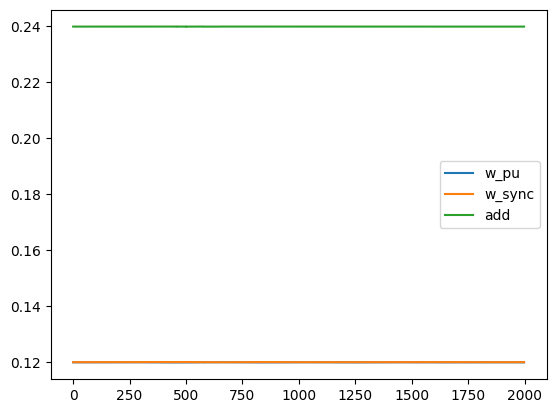

LdChange
['1.5', '0.2']


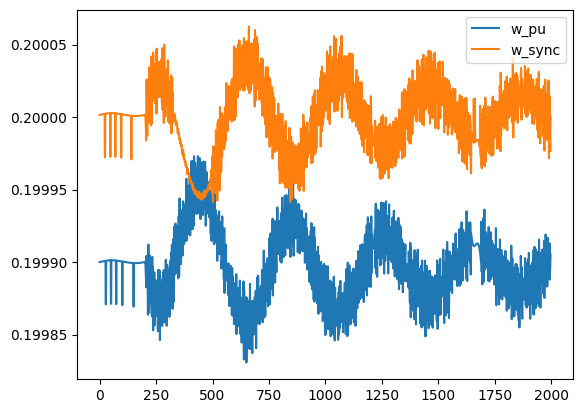

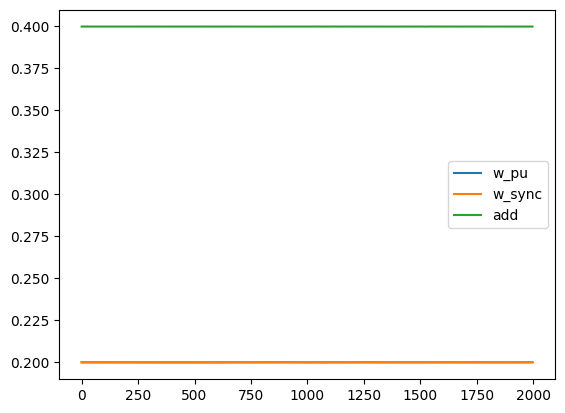

LdChange
['1.5', '0.25']


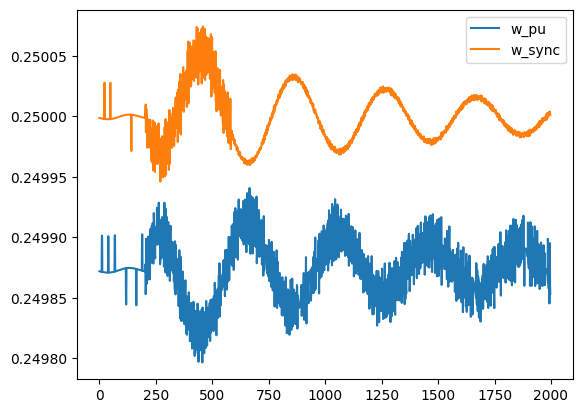

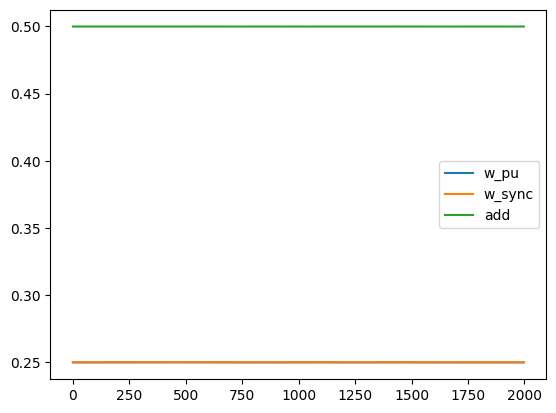

LdChange
['1.8', '0.2']


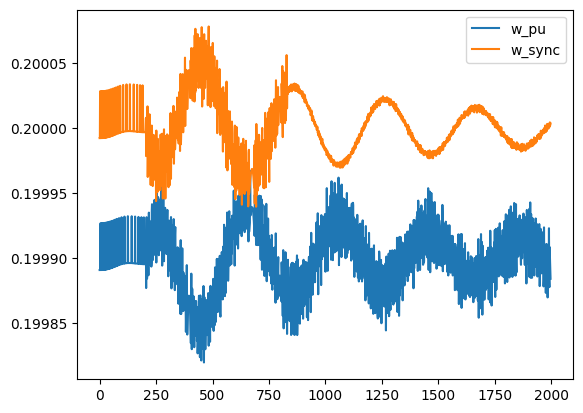

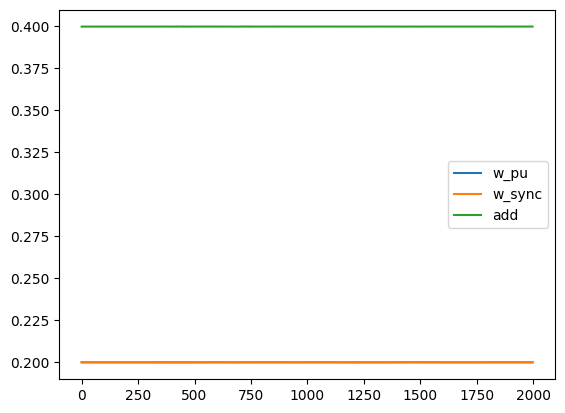

SyncOn
['1.0', '0.0']


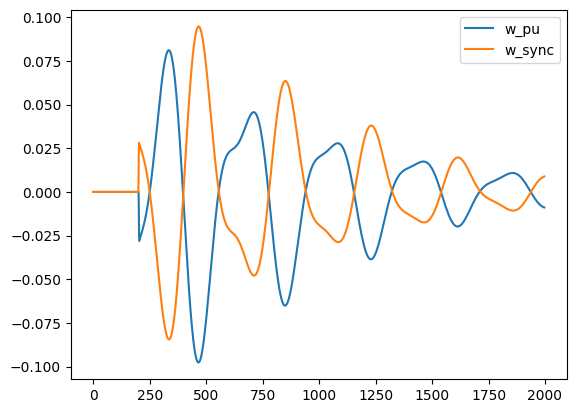

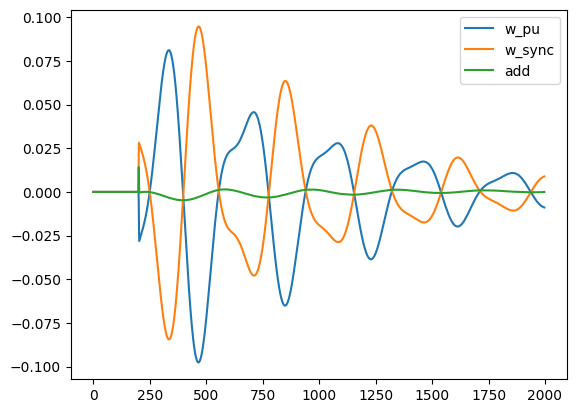

SyncOn
['1.2', '0.12']


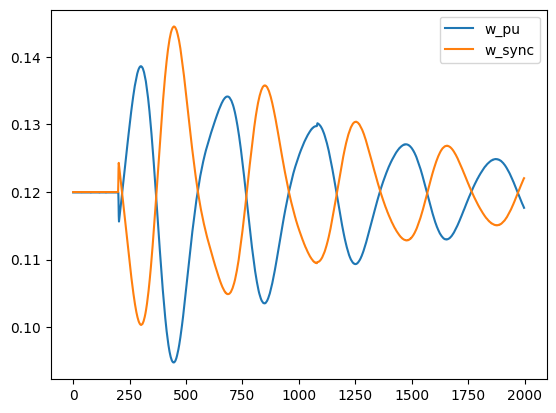

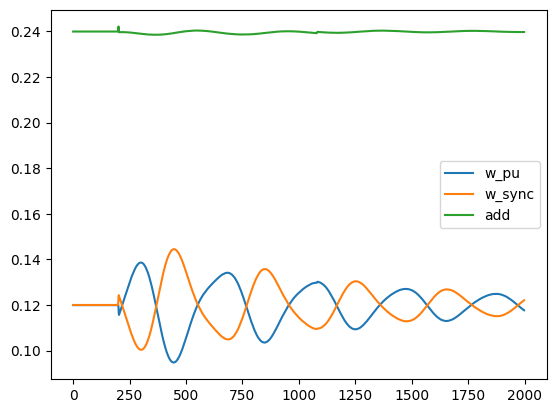

SyncOn
['1.5', '0.1']


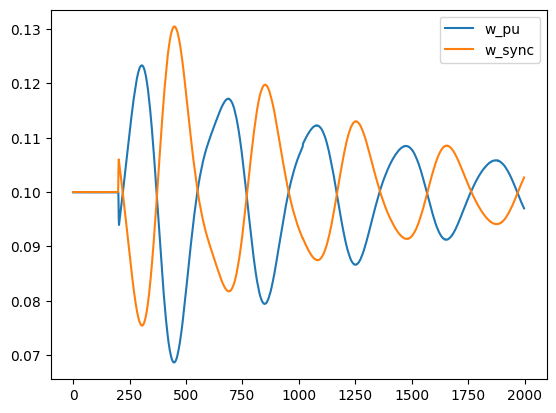

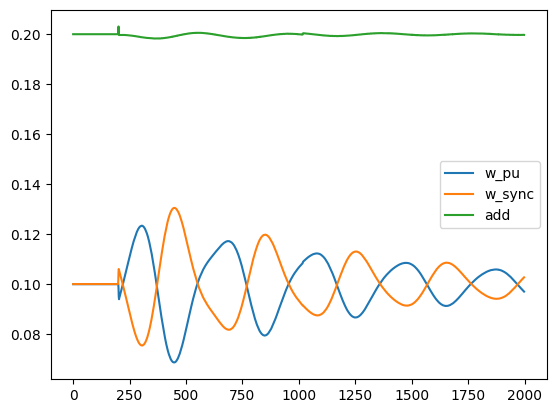

SyncOn
['1.5', '0.2']


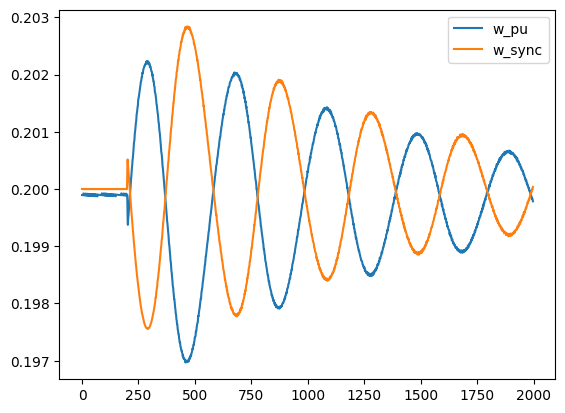

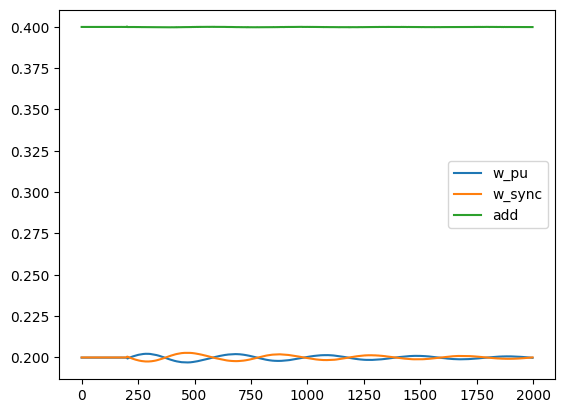

SyncOn
['1.5', '0.25']


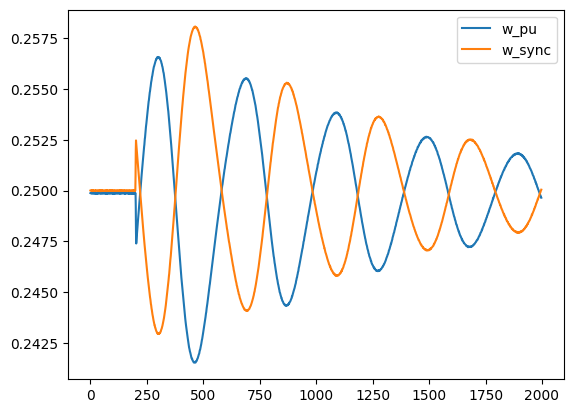

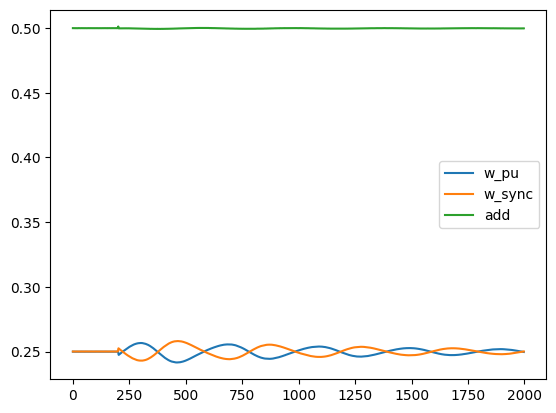

SyncOn
['1.8', '0.2']


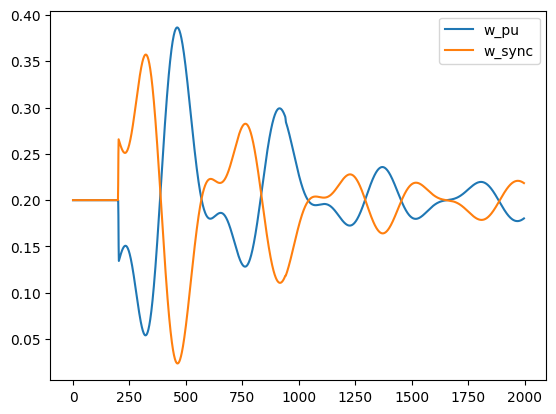

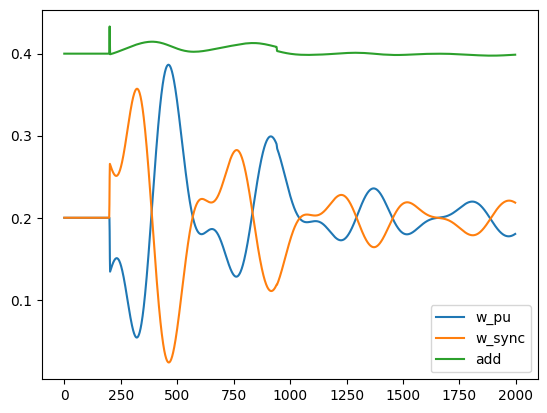

In [10]:
for v in data_dict.values():
    print(v.case)
    print(v.variables)
    pd_data = v.data
    pd_data.columns = ['Time', 'Tm', 'w_pu', 'Te', 'w_sync']
    time_step = pd_data.Time[1] - pd_data.Time[0]
    w_pu_t = (pd_data.w_pu.to_numpy()[2:] - pd_data.w_pu.to_numpy()[:-2]) / (2 * time_step)
    w_sync_t = (pd_data.w_sync.to_numpy()[2:] - pd_data.w_sync.to_numpy()[:-2]) / (2 * time_step)
    result_w_pu = pd_data.Tm.to_numpy()[1:-1] - pd_data.Te.to_numpy()[1:-1] - 2*np.float64(v.variables[0])*w_pu_t - np.float64(v.variables[1])*(pd_data.w_pu.to_numpy()[1:-1]-1)
    result_w_sync = pd_data.Tm.to_numpy()[1:-1] - pd_data.Te.to_numpy()[1:-1] - 2*np.float64(v.variables[0])*w_sync_t - np.float64(v.variables[1])*(pd_data.w_sync.to_numpy()[1:-1]-1)
    

    plt.figure()
    plt.plot(result_w_pu, label = 'w_pu')
    plt.plot(result_w_sync, label = 'w_sync')
#     plt.plot(result_w_pu+result_w_sync, label = 'add')
    plt.legend()
    plt.show()
    plt.figure()
    plt.plot(result_w_pu, label = 'w_pu')
    plt.plot(result_w_sync, label = 'w_sync')
    plt.plot(result_w_pu+result_w_sync, label = 'add')
    plt.legend()
    plt.show()

SyncOn
['1.0', '0.0']


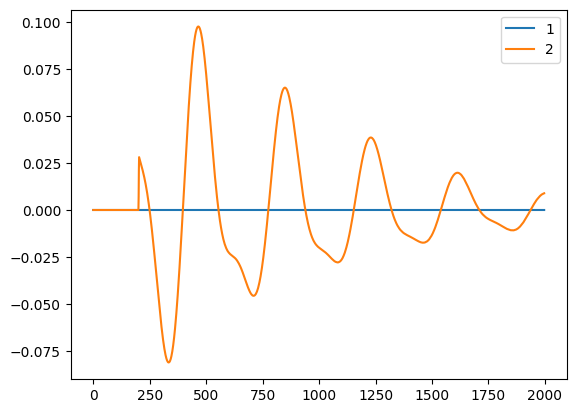

SyncOn
['1.2', '0.12']


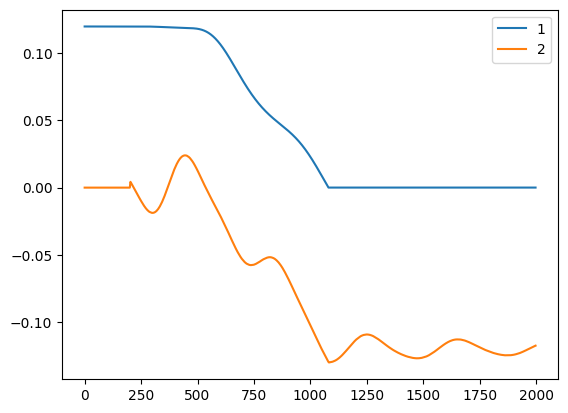

SyncOn
['1.5', '0.1']


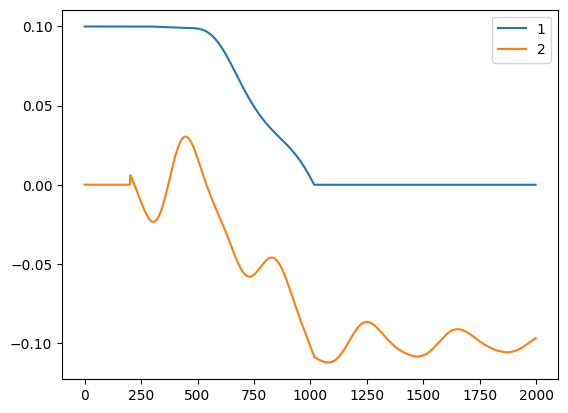

SyncOn
['1.5', '0.2']


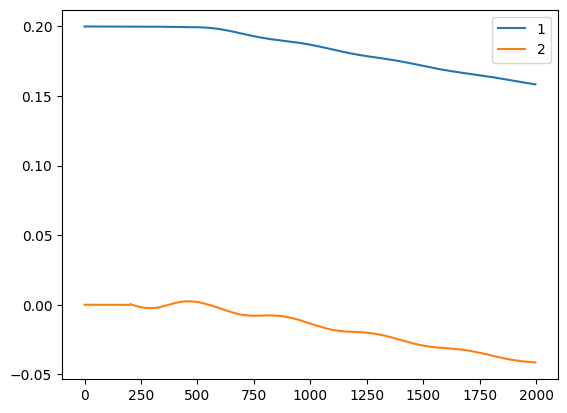

SyncOn
['1.5', '0.25']


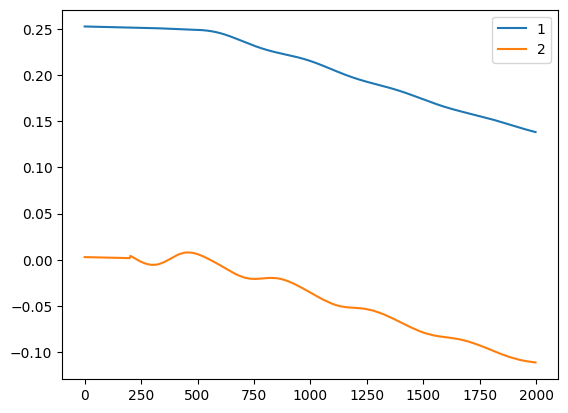

SyncOn
['1.8', '0.2']


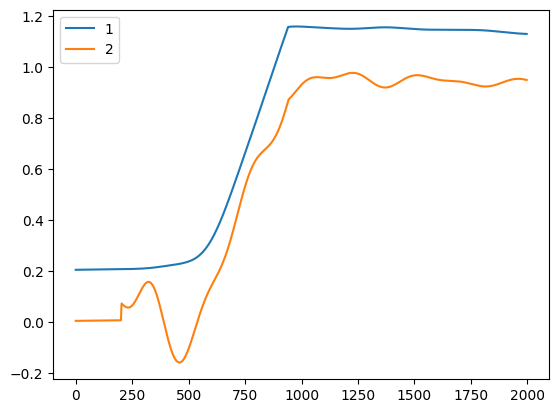

In [11]:
for v in list(data_dict.values())[5:]:
    print(v.case)
    print(v.variables)
    pd_data = v.data
    pd_data.columns = ['Time', 'Tm', 'w_pu', 'Te', 'w_sync']
    time_step = pd_data.Time[1] - pd_data.Time[0]
    w_pu_t = (pd_data.w_pu.to_numpy()[2:] - pd_data.w_pu.to_numpy()[:-2]) / (2 * time_step)
    w_sync_t = (pd_data.w_sync.to_numpy()[2:] - pd_data.w_sync.to_numpy()[:-2]) / (2 * time_step)
    result_w_pu = pd_data.Tm.to_numpy()[1:-1] - pd_data.Te.to_numpy()[1:-1] - 2*np.float64(v.variables[0])*w_pu_t - np.float64(v.variables[1])*(pd_data.w_pu.to_numpy()[1:-1]-1)
    result_w_sync = pd_data.Tm.to_numpy()[1:-1] - pd_data.Te.to_numpy()[1:-1] - 2*np.float64(v.variables[0])*w_sync_t - np.float64(v.variables[1])*(pd_data.w_sync.to_numpy()[1:-1]-1)
    

    plt.figure()
    plt.plot(pd_data.Tm.to_numpy()[1:-1], label = '1')
    plt.plot(pd_data.Te.to_numpy()[1:-1] + 2*np.float64(v.variables[0])*w_pu_t + np.float64(v.variables[1])*(pd_data.w_pu.to_numpy()[1:-1]-1), label = '2')
    # plt.plot(result_w_sync, label = 'w_sync')
#     plt.plot(result_w_pu+result_w_sync, label = 'add')
    plt.legend()
    plt.show()
    # plt.figure()
    # plt.plot(result_w_pu, label = 'w_pu')
    # plt.plot(result_w_sync, label = 'w_sync')
    # plt.plot(result_w_pu+result_w_sync, label = 'add')
    # plt.legend()
    # plt.show()

In [13]:
pd_data2 = pd.read_csv('..\data\history_data\927testforTe2.csv')
pd_data2

,Time,Subsystem #1|CTLs|Vars|Tm,Subsystem #1|Machines|M|TESTSPDOUT,Subsystem #1|Machines|M|TESTTELECT
0,0.00000,0.000000,1.005288,3.309534e-08
1,0.00005,0.000000,1.005288,3.263598e-08
2,0.00010,0.000000,1.005288,3.258290e-08
3,0.00015,0.000000,1.005288,3.293628e-08
4,0.00020,0.000000,1.005288,3.369583e-08
...,...,...,...,...
7995,0.39975,0.914581,0.970005,6.204557e-01
7996,0.39980,0.914565,0.970010,6.204525e-01
7997,0.39985,0.914550,0.970015,6.204492e-01
7998,0.39990,0.914534,0.970020,6.204459e-01


In [14]:
pd_data2.columns = ['Time', 'Tm', 'w_pu', 'Te']
pd_data2

,Time,Tm,w_pu,Te
0,0.00000,0.000000,1.005288,3.309534e-08
1,0.00005,0.000000,1.005288,3.263598e-08
2,0.00010,0.000000,1.005288,3.258290e-08
3,0.00015,0.000000,1.005288,3.293628e-08
4,0.00020,0.000000,1.005288,3.369583e-08
...,...,...,...,...
7995,0.39975,0.914581,0.970005,6.204557e-01
7996,0.39980,0.914565,0.970010,6.204525e-01
7997,0.39985,0.914550,0.970015,6.204492e-01
7998,0.39990,0.914534,0.970020,6.204459e-01


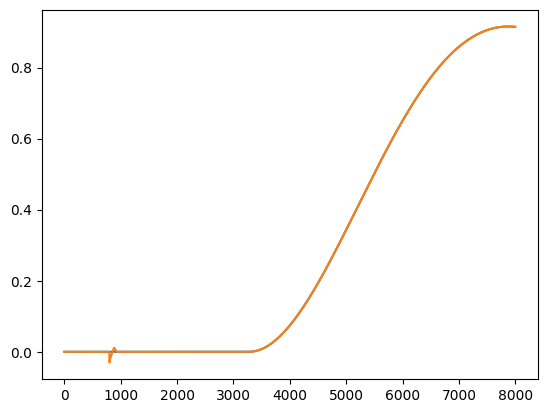

In [17]:
pd_data = pd_data2
time_step = pd_data.Time[1] - pd_data.Time[0]
w_pu_t = (pd_data.w_pu.to_numpy()[2:] - pd_data.w_pu.to_numpy()[:-2]) / (2 * time_step)
result_w_pu = pd_data.Tm.to_numpy()[1:-1] - pd_data.Te.to_numpy()[1:-1] - 2*np.float64(1.5)*w_pu_t - np.float64(0.25)*(pd_data.w_pu.to_numpy()[1:-1]-1)

plt.figure()
plt.plot(pd_data.Tm.to_numpy()[1:-1], label = '1')
plt.plot(pd_data.Te.to_numpy()[1:-1] + 2*np.float64(1.5)*w_pu_t + np.float64(0.15)*(pd_data.w_pu.to_numpy()[1:-1]-1), label = '2')

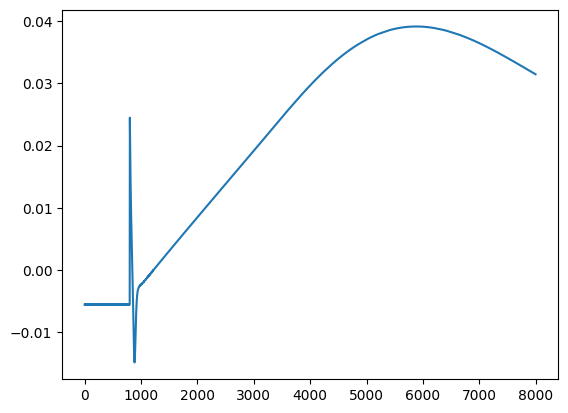

In [28]:
final_res = pd_data.Tm.to_numpy()[1:-1] - (pd_data.Te.to_numpy()[1:-1] + 2*np.float64(1.5)*w_pu_t + np.float64(1.2)*(pd_data.w_pu.to_numpy()[1:-1]-1))
plt.plot(final_res)